In [1]:
#import librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading the data
data = pd.read_csv('Standard Metropolitan Areas Data - train_data - data.csv')
data.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
land_area         99 non-null int64
percent_city      99 non-null float64
percent_senior    99 non-null float64
physicians        99 non-null int64
hospital_beds     99 non-null int64
graduates         99 non-null float64
work_force        99 non-null float64
income            99 non-null int64
region            99 non-null int64
crime_rate        99 non-null float64
dtypes: float64(5), int64(5)
memory usage: 7.9 KB


Our dataset has 99 rows and 10 columns. With 5 columns having float datatype and other 5 columns having int datatype. And our dataset has no missing values.

In [4]:
data.isnull().sum()

land_area         0
percent_city      0
percent_senior    0
physicians        0
hospital_beds     0
graduates         0
work_force        0
income            0
region            0
crime_rate        0
dtype: int64

In [5]:
data.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


In [6]:
correlationmatrix = data.corr()
correlationmatrix

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
land_area,1.000000,-0.077320,0.092226,0.085054,0.081034,0.088728,0.135792,0.111404,0.292392,0.293907
percent_city,-0.077320,1.000000,-0.250995,0.067391,0.052898,0.076720,0.016011,0.019235,0.235880,0.159596
percent_senior,0.092226,-0.250995,1.000000,0.056454,0.083775,-0.155695,0.035240,0.046073,-0.242811,-0.177992
physicians,0.085054,0.067391,0.056454,1.000000,0.974241,0.049500,0.965597,0.976209,-0.140961,0.187763
hospital_beds,0.081034,0.052898,0.083775,0.974241,1.000000,-0.003892,0.967913,0.974416,-0.220305,0.109799
graduates,0.088728,0.076720,-0.155695,0.049500,-0.003892,1.000000,0.044054,0.045578,0.246226,0.290880
work_force,0.135792,0.016011,0.035240,0.965597,0.967913,0.044054,1.000000,0.996735,-0.144022,0.175945
income,0.111404,0.019235,0.046073,0.976209,0.974416,0.045578,0.996735,1.000000,-0.152016,0.175797
region,0.292392,0.235880,-0.242811,-0.140961,-0.220305,0.246226,-0.144022,-0.152016,1.000000,0.636192
crime_rate,0.293907,0.159596,-0.177992,0.187763,0.109799,0.290880,0.175945,0.175797,0.636192,1.000000


Our mission is to predict crime_rate and it seems region plays importance on the rate of crime.

Lets build a DecisionTreeRegressor model

In [7]:
#Seperating X input features and y target variable
X=data.drop('crime_rate', axis =1)
y = data['crime_rate']

In [8]:
#Splitting train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
#buildng a model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
#predicting the target variable
print(X_train.head())
print('\n')
print(y_train.head())
print('\n')
print(model.predict(X_train.head()))

    land_area  percent_city  percent_senior  physicians  hospital_beds  \
94       1511          38.7            10.7         348           1093   
30       3214          47.7             9.4        1285           3459   
28       2624          30.4            12.2        1532           4730   
89       1509          37.6            12.0        1087           4900   
5        2815          23.1             6.7        7340          16941   

    graduates  work_force  income  region  
94       50.4       127.2    1452       4  
30       40.3       401.7    4924       3  
28       55.2       356.5    5094       1  
89       51.4       319.6    3982       1  
5        68.3      1541.9   25663       3  


94    70.66
30    45.14
28    38.75
89    45.19
5     58.48
Name: crime_rate, dtype: float64


[70.66 45.14 38.75 45.19 58.48]


In [11]:
#checking the score
train_evaluate = model.score(X_test, y_test)
print(train_evaluate)

0.0953402416856255


In [12]:
#calculating the rmse to evaluate the performance of the model

from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_mse = mean_squared_error(train_predictions, y_train)
test_mse = mean_squared_error(test_predictions, y_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

0.0
13.355095157529453


In [13]:
#visualize our model prediction
from sklearn.tree import export_graphviz
import graphviz

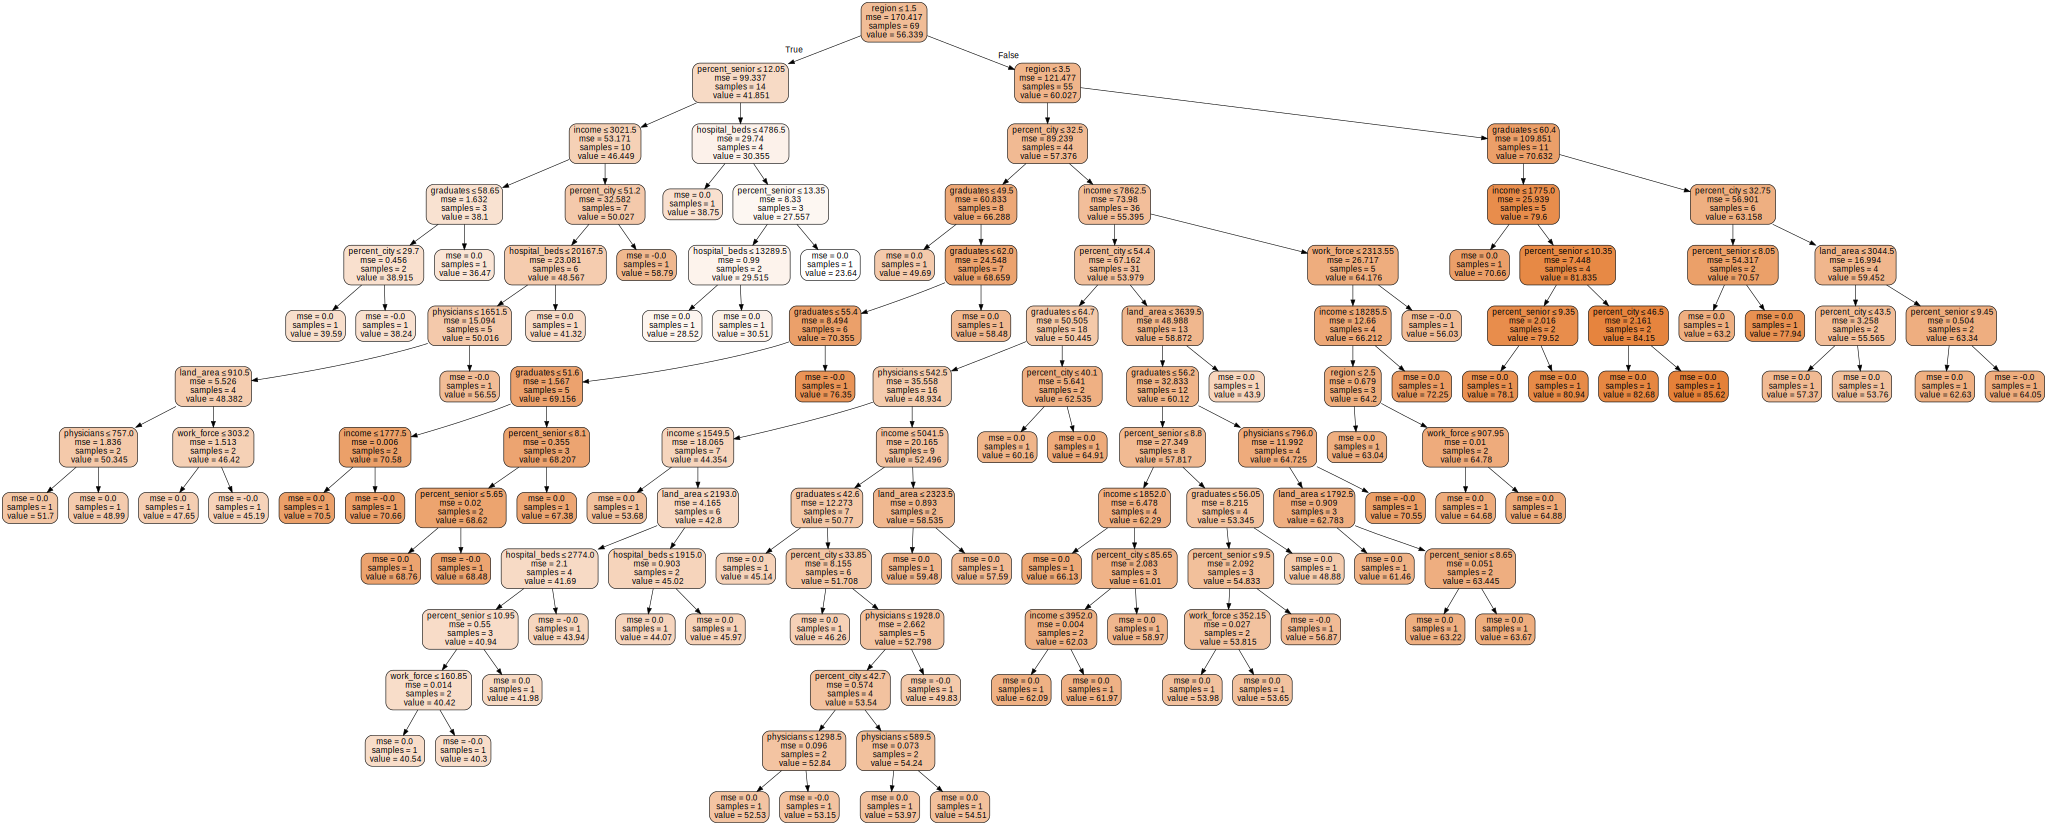

In [14]:
dot_data= export_graphviz(model, out_file=None, 
                    feature_names=X_test.columns,   
                      filled=True, rounded=True,  
                      special_characters=True)

graph1=graphviz.Source(dot_data)
graph1